<a href="https://colab.research.google.com/github/yoonsoli/Machine_Learning_to_Study_Alone/blob/main/Chapter2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [4]:
np.column_stack(([1,2,3,], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

column_stack : 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결하는 함수

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))

In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

np.ones : 1을 채운 배열을 만들어줌 // np.zeros : 0을 채운 배열을 만들어줌

In [8]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) 

random_state 매개변수 : 나누고 싶은 리스트나 배열을 전달하면 나눠줌

In [12]:
print(train_input.shape, test_input.shape) 

(36, 2) (13, 2)


shape : 입력 데이터의 크기를 알아봄

In [13]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [14]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42) 

stratify : 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눠줌












In [17]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)  

1.0

In [19]:
print(kn.predict([[25, 150]]))

[0.]


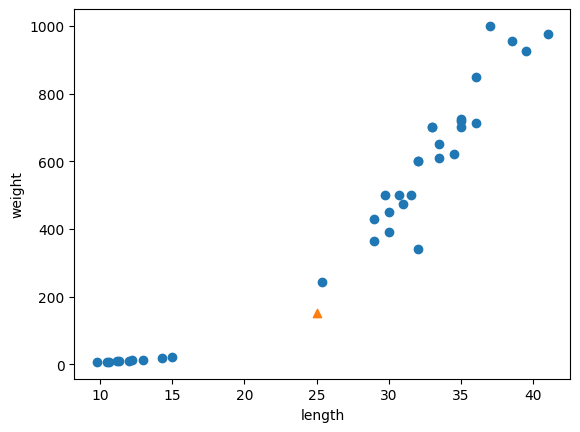

In [21]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # marker 매개변수는 모양을 지정함
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
distances, indexes = kn.kneighbors([[25, 150]])

In [27]:
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


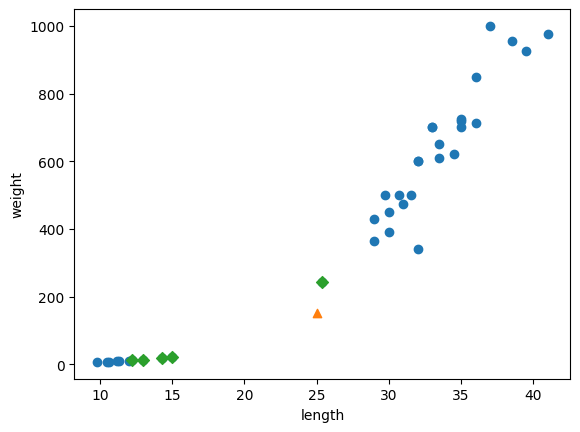

In [24]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [29]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [30]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
